In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data**

In [21]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


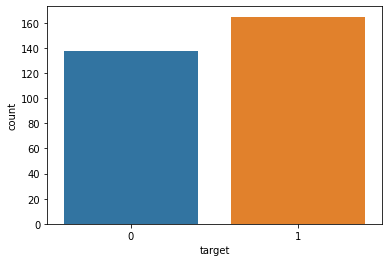

In [22]:
sns.countplot(data['target'])

# **Without Package**

In [5]:
# gaussClf will be the class that will have the Gaussian naive bayes classifier implimentation
class gaussClf:
    def separate_by_classes(self, X, y):
        ''' This function separates our dataset in subdatasets by classes '''
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            classes_index[class_type] = np.argwhere(y==class_type)
            subdatasets[class_type] = X[classes_index[class_type], :]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets
    def fit(self, X, y):
      ''' The fitting function '''
      separated_X = self.separate_by_classes(X, y)
      self.means = {}
      self.std = {}
      for class_type in self.classes:
          # Here we calculate the mean and the standart deviation from datasets
          self.means[class_type] = np.mean(separated_X[class_type], axis=0)[0]
          self.std[class_type] = np.std(separated_X[class_type], axis=0)[0]

    def calculate_probability(self, x, mean, stdev):
      ''' This function calculates the class probability using gaussian distribution '''
      exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
      return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def predict_proba(self, X):
      ''' This function predicts the probability for every class '''
      self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
      for cls in self.classes:
          for i in range(len(self.means)):
              print(X[i])
              self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
      self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
      return self.class_prob

    def predict(self, X):
      ''' This funtion predicts the class of a sample '''
      pred = []
      for x in X:
          pred_class = None
          max_prob = 0
          for cls, prob in self.predict_proba(x).items():
              if prob>max_prob:
                  max_prob = prob
                  pred_class = cls
          pred.append(pred_class)
      return pred

In [6]:
x = data[['chol','trestbps','thalach']]
y = data[['target']]
x

,chol,trestbps,thalach
0,233,145,150
1,250,130,187
2,204,130,172
3,236,120,178
4,354,120,163
...,...,...,...
298,241,140,123
299,264,110,132
300,193,144,141
301,131,130,115


In [7]:
x = x.to_numpy()
y = y.to_numpy()

In [8]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [9]:
train_X, test_X , train_y , test_y = train_test_split(x , y , test_size = 0.2, random_state = 32)
print(train_X.shape)
print(test_X.shape)

(242, 3)
(61, 3)


In [10]:
gnb = gaussClf()
gnb.fit(X=train_X,y=train_y)
y_pred = gnb.predict(test_X)

{0: 108, 1: 134}
-0.7587962472987168
0.021488023158475058
-0.7587962472987168
0.021488023158475058
-1.3578861986206336
1.849100940216202
-1.3578861986206336
1.849100940216202
-0.14038081367609284
0.47839125242290675
-0.14038081367609284
0.47839125242290675
0.61331299605148
0.8210686743712305
0.61331299605148
0.8210686743712305
0.36208172614228906
-1.234995857318712
0.36208172614228906
-1.234995857318712
0.07219949163168413
0.19282673413263696
0.07219949163168413
0.19282673413263696
-1.3385607163199267
0.47839125242290675
-1.3385607163199267
0.47839125242290675
-0.06307888447326485
1.0495202890034463
-0.06307888447326485
1.0495202890034463
1.4443087349818808
0.47839125242290675
1.4443087349818808
0.47839125242290675
-0.39161208358528377
-0.6638668207381725
-0.39161208358528377
-0.6638668207381725
-0.17903177827750683
-0.6638668207381725
-0.17903177827750683
-0.6638668207381725
-0.9520510703057867
-0.09273778415763287
-0.9520510703057867
-0.09273778415763287
0.14950142083451212
0.1928267

In [11]:
lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 50.81967213114754 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.51      0.97      0.67        31

    accuracy                           0.51        61
   macro avg       0.50      0.50      0.36        61
weighted avg       0.50      0.51      0.37        61



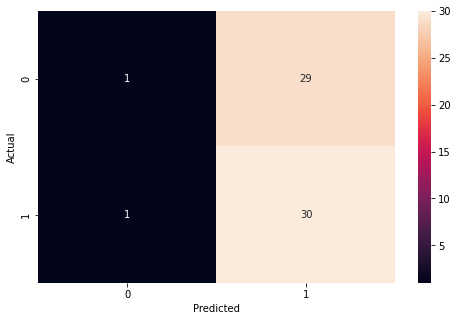

In [12]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
d = lr_conf_matrix 
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()

# **With Package**

In [13]:
nb = GaussianNB()
nb.fit(train_X,train_y)
y_pred = nb.predict(test_X)

lr_conf_matrix = confusion_matrix(test_y, y_pred)
lr_acc_score = accuracy_score(test_y, y_pred)
print("Accuracy :",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_y,y_pred))

Accuracy : 68.85245901639344 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.66      0.81      0.72        31

    accuracy                           0.69        61
   macro avg       0.70      0.69      0.68        61
weighted avg       0.70      0.69      0.68        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


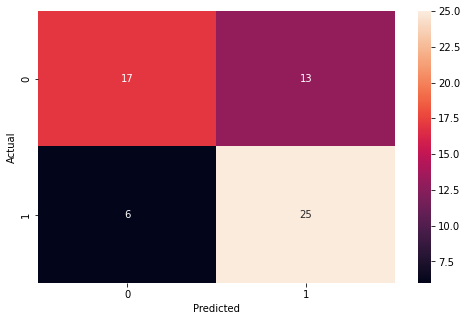

In [14]:
y_true = ['0','1']
pred = ['zero(0)','one(1)']
d = lr_conf_matrix 
df_cm = pd.DataFrame(d, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.heatmap(df_cm,fmt="d", annot=True)
plt.show()